In [11]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

In [5]:
vol_data = pd.read_csv('~/Code/giadapi/crypto/raw_data/all_columns_daily_090323.csv',lineterminator='\n',index_col=0)
vol_data

,Unnamed: 0,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price
0,0,2021-01-01,0.083330,0.493347,0.423323,12561.859509,NaN,NaN,NaN,29374.152344
1,1,2021-01-02,0.134531,0.438811,0.426658,30124.352145,NaN,NaN,NaN,32127.267578
2,2,2021-01-03,0.147802,0.428930,0.423267,26167.331282,NaN,NaN,NaN,32782.023438
3,3,2021-01-04,0.104159,0.507274,0.388567,18041.199084,NaN,NaN,NaN,31971.914062
4,4,2021-01-05,0.081743,0.521464,0.396793,17473.551568,NaN,NaN,NaN,33992.429688
...,...,...,...,...,...,...,...,...,...,...
793,793,2023-03-05,0.107813,0.541465,0.350722,14968.952910,0.358301,0.358391,0.363660,22435.513672
794,794,2023-03-06,0.109010,0.507571,0.383419,137824.833122,0.359351,0.359776,0.363419,22429.757812
795,795,2023-03-07,0.123972,0.520640,0.355388,19028.050010,0.360315,0.359762,0.363403,22219.769531
796,796,2023-03-08,0.087879,0.515427,0.396694,19216.616481,0.366446,0.360095,0.364243,21718.080078


In [14]:
def historical_graph(vol_data):
    matplotlib.rc_file_defaults()

    elon_add_BTC = vol_data['date'][26]
    elon_add_BTC_anno = vol_data['date'][31]
    elon_add_BTC_text = '''Elon Musk adds #bitcoin 
    to his twitter profile amind 
    rumours of Tesla accepting 
    Bitcoin payments'''
    elon_lose_BTC = vol_data['date'][131]
    elon_lose_BTC_anno = vol_data['date'][136]
    elon_lose_BTC_text = '''Tesla stops accepting Bitcoin 
    as payment for its cars due to 
    concerns about its carbon emissions'''

    ax1 = sns.set_style("whitegrid")

    fig, ax1 = plt.subplots(figsize=(40,8))

    sns.lineplot(x = vol_data['date'], y=vol_data['BTC_price'], sort = False, color='blue',legend='brief')

    ax2 = ax1.twinx()
    sns.lineplot(x = vol_data['date'], y=vol_data['MA7_Sentiment'], sort = False, ax=ax2, color='orange',legend='brief').set_xticklabels
    ax2.xaxis.set_major_locator(md.MonthLocator())
    ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
    ax2.axvline(elon_add_BTC, color = 'red')
    ax2.axvline(elon_lose_BTC, color = 'red')

    ax1.legend(vol_data[['BTC_price','MA7_Sentiment']], loc='upper right')

    plt.text(x=elon_add_BTC_anno, y=0.34,s=elon_add_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')
    plt.text(x=elon_lose_BTC_anno, y=0.34,s=elon_lose_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')

    plt.grid()
    return fig



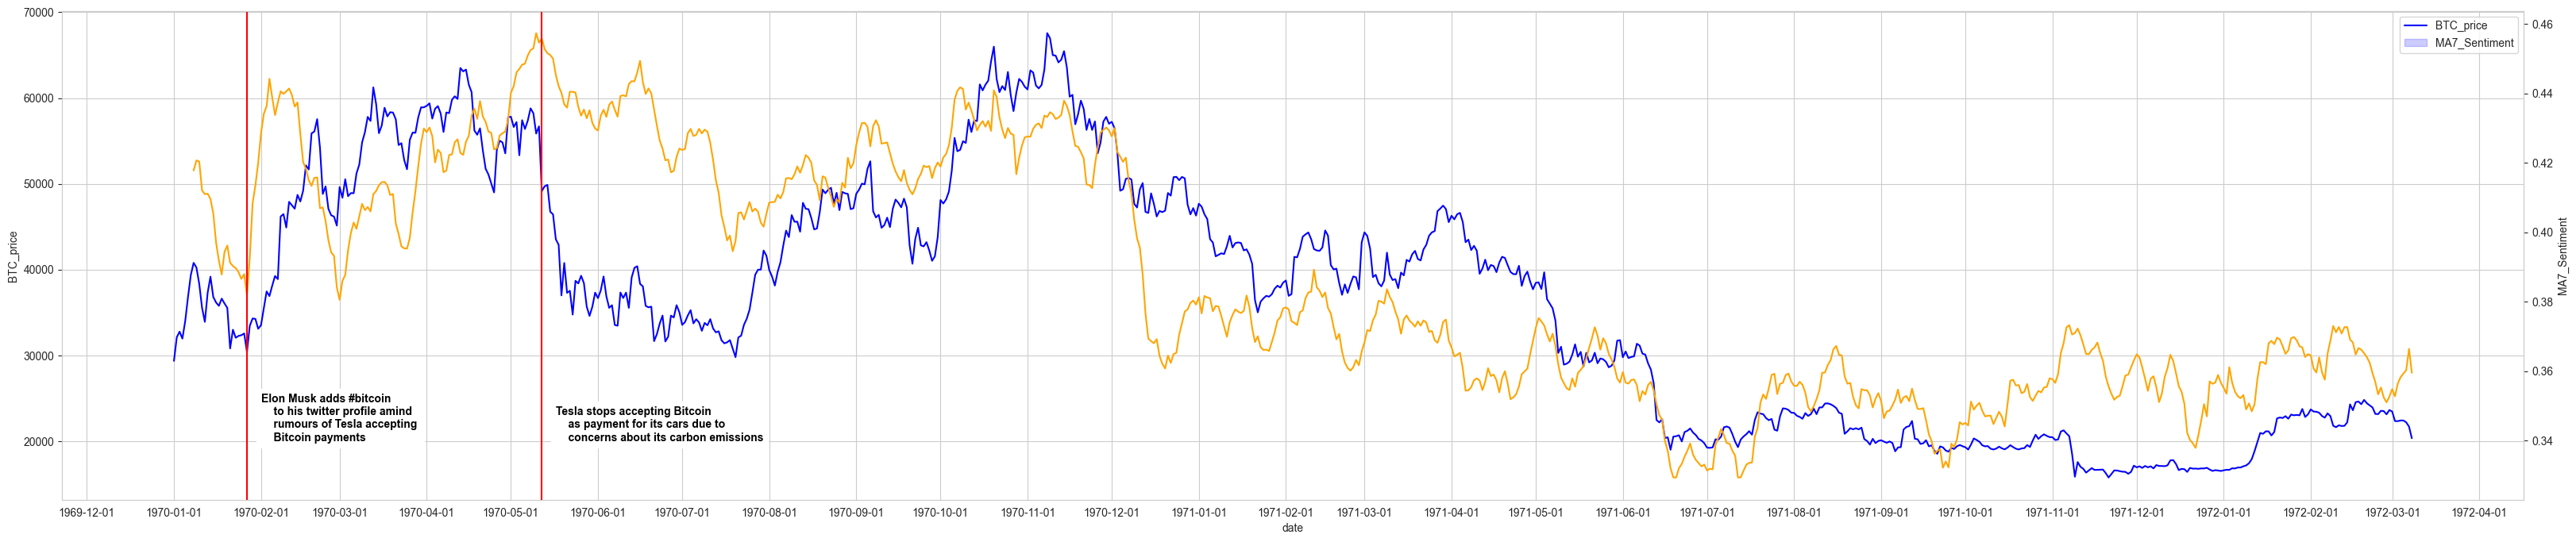

In [16]:
historical_graph(vol_data);